In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
def get_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def get_dist_vec(base, v):
    base = np.broadcast_to(base, v.shape)
    return np.array(list(map(get_dist, base, v)))

def get_dist_matrix(v):
    temp = np.zeros([v.shape[0], v.shape[0]])
    for i in range(temp.shape[0]):
        temp[i, :] = get_dist_vec(v[i], v)
    return temp

class knnClassifier():
    def __init__(self, v):
        self.matrix = get_dist_matrix(v)
        self.dtype = [('index', np.float32), ('dist', np.float32)]
    def knn_dist(self, index, k):
        return np.sort(np.array(list(enumerate(self.matrix[index])), dtype=self.dtype), order='dist')[1:k+1]
    def avg_knn_dist(self, index, k):
        return np.mean(self.knn_dist(index, k)['dist'])
        

In [3]:
def draw_2d_gaussian(array, array_point, sigma, dim):
    gaussian_temp = np.zeros([dim, dim])
    for y in range(dim):
        for x in range(dim):
            temp_y, temp_x = y - dim // 2, x - dim // 2
            gaussian_temp[y, x] = (1/(2 * np.pi * sigma ** 2)) * np.exp(-1 * (temp_x ** 2 + temp_y ** 2) / (2 * sigma ** 2))
    gaussian_temp /= gaussian_temp.max()
                                    
    for y in range(array_point[0] - dim // 2, array_point[0] + dim // 2 + 1):
        for x in range(array_point[1] - dim // 2, array_point[1] + dim // 2 + 1):
            if y >= 0 and x >= 0 and y < array.shape[0] and x < array.shape[1]:
#                 array[y, x] = array[y, x] + gaussian_temp[y - (array_point[0] - dim // 2), x - (array_point[1] - dim // 2)]
                array[y, x] = np.maximum(array[y, x], gaussian_temp[y - (array_point[0] - dim // 2), x - (array_point[1] - dim // 2)])

In [13]:
import os
import json
import matplotlib.pyplot as plt

base_images_path = './dataset/images'
aug_masks_path = './dataset/augmented_masks'
json_path = './dataset/images/meron5_10-50-10.json'

if (os.path.exists(aug_masks_path) == False):
    os.makedirs(aug_masks_path)

json_data = json.load(open(json_path))['_via_img_metadata']

beta = 0.3
neighbors = 3

for key in json_data.keys():
    print("Key:", key)
    
    filename = json_data[key]['filename']
    midpoints = []
    
    for region in json_data[key]['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']
        midpoints.append(np.array([y + height // 2, x + width // 2]))
    
    aug_mask = np.zeros(plt.imread(os.path.join(base_images_path, filename)).shape)
    
    print("drawing...")
    for i in tqdm(range(len(midpoints))):
        sigma = 3 ** 2
        draw_2d_gaussian(aug_mask, midpoints[i], sigma, sigma * 6 + 1)
        
    aug_mask /= aug_mask.max()
    
    np.save(os.path.join(aug_masks_path, filename + '.npy'), aug_mask)
#     break

Key: Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted10.png748548
drawing...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 94.15it/s]


Key: Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted20.png753013
drawing...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 94.92it/s]


Key: Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted30.png752004
drawing...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 94.91it/s]


Key: Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted40.png755915
drawing...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 95.12it/s]


Key: Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted50.png762688
drawing...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:01<00:00, 95.02it/s]


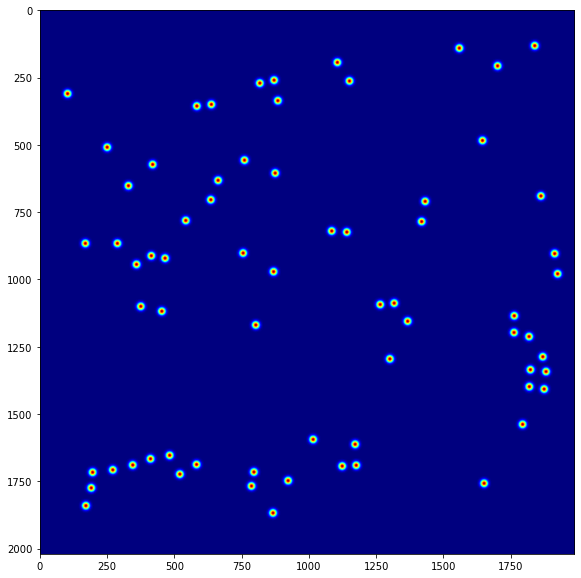

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
plt.imshow(aug_mask, cmap='jet')

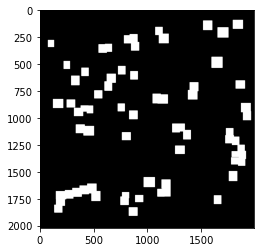

In [39]:
temp = np.load('./dataset/masks/Bubbles_movie_01_x1987x2020x81_3cv2_NLM_template20_search62_inverted10.png.npy')
plt.imshow(temp, cmap='Greys_r')